<a href="https://colab.research.google.com/github/HaJeong-K/multi_cam_total/blob/main/%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D_0816.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 16 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

### 데이터 불러오기

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
DATA_PATH = '/content/drive/MyDrive/Colab Notebooks/data/bike-sharing-demand/'
train = pd.read_csv(DATA_PATH + 'train.csv')
test = pd.read_csv(DATA_PATH + 'test.csv')
submission = pd.read_csv(DATA_PATH + 'sampleSubmission.csv')

In [ ]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [ ]:
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [ ]:
submission.head()

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


## 탐색적 자료 분석
- datetime : 1시간 간격 데이터 수집
- season
  + 1 : 봄
  + 2 : 여름
  + 3 : 가을
  + 4 : 겨울

- holiday
  + 0 : 공휴일 아님
  + 1 : 공휴일

- workingday
  + 0 : 평일이 아님
  + 1 : 평일

- weather

  + 1 : 맑음
  + 2 : 약간 흐림
  + 3 : 약한 눈, 비
  + 4 : 폭우, 폭설 (기상 매우 악화)

- 종속변수 : count(자전거 대여 수량)

## 문제 정의
- 각 시간대별로 자전거 대여 수량을 예측하세요!

## 데이터 확인
-casual, registered가 훈련데이터에 존재, 테스트 데이터에는 현재 없는 상황
  + casual : 비회원수
  + registered : 회원수

## 날짜 데이터 변형

In [ ]:
train['date'] = train['datetime'].apply(lambda x : x.split()[0])
train['year'] = train['datetime'].apply(lambda x: x.split()[0].split('-')[0])
train['month'] = train['datetime'].apply(lambda x: x.split()[0].split('-')[1])
train['day'] = train['datetime'].apply(lambda x: x.split()[0].split('-')[2])

train['hour'] = train['datetime'].apply(lambda x : x.split()[1].split(':')[0])
train['minute'] = train['datetime'].apply(lambda x : x.split()[1].split(':')[1])
train['second'] = train['datetime'].apply(lambda x : x.split()[1].split(':')[2])
train

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,year,month,day,hour,minute,second
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,2011-01-01,2011,01,01,00,00,00
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,2011-01-01,2011,01,01,01,00,00
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2011-01-01,2011,01,01,02,00,00
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,2011-01-01,2011,01,01,03,00,00
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,2011-01-01,2011,01,01,04,00,00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,2012-12-19,2012,12,19,19,00,00
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,2012-12-19,2012,12,19,20,00,00
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,2012-12-19,2012,12,19,21,00,00
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,2012-12-19,2012,12,19,22,00,00


- 요일 반환

In [ ]:
from datetime import datetime
import calendar

sample_df = train['date'][300]
print(datetime.strptime(sample_df, "%Y-%m-%d"))
print(datetime.strptime(sample_df, "%Y-%m-%d").weekday())
print(calendar.day_name[3])

2011-01-13 00:00:00
3
Thursday


In [ ]:
train['weekday'] = train['date'].apply(
    lambda x : calendar.day_name[datetime.strptime(x, "%Y-%m-%d").weekday()]
)

train

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,year,month,day,hour,minute,second,weekday
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,2011-01-01,2011,01,01,00,00,00,Saturday
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,2011-01-01,2011,01,01,01,00,00,Saturday
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2011-01-01,2011,01,01,02,00,00,Saturday
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,2011-01-01,2011,01,01,03,00,00,Saturday
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,2011-01-01,2011,01,01,04,00,00,Saturday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,2012-12-19,2012,12,19,19,00,00,Wednesday
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,2012-12-19,2012,12,19,20,00,00,Wednesday
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,2012-12-19,2012,12,19,21,00,00,Wednesday
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,2012-12-19,2012,12,19,22,00,00,Wednesday


In [ ]:
# season
train['season'] = train['season'].map({1: "봄", 2: "여름", 3: "가을", 4: "겨울"})

# weather
train['weather'] = train['weather'].map({1: "맑음", 2: "약간흐림", 3: "약간의 눈 또는 비", 4:"강한 비 또는 눈"})
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,year,month,day,hour,minute,second,weekday
0,2011-01-01 00:00:00,봄,0,0,맑음,9.84,14.395,81,0.0,3,13,16,2011-01-01,2011,01,01,00,00,00,Saturday
1,2011-01-01 01:00:00,봄,0,0,맑음,9.02,13.635,80,0.0,8,32,40,2011-01-01,2011,01,01,01,00,00,Saturday
2,2011-01-01 02:00:00,봄,0,0,맑음,9.02,13.635,80,0.0,5,27,32,2011-01-01,2011,01,01,02,00,00,Saturday
3,2011-01-01 03:00:00,봄,0,0,맑음,9.84,14.395,75,0.0,3,10,13,2011-01-01,2011,01,01,03,00,00,Saturday
4,2011-01-01 04:00:00,봄,0,0,맑음,9.84,14.395,75,0.0,0,1,1,2011-01-01,2011,01,01,04,00,00,Saturday


## 시각화 코드 작성
- count = 기울기(x1 + x2 + x3)
- 종속변수 (=반응변수)가 제일 중요한 변수
- count는 고정값
  + count 수치 데이터를 기반으로 한 시각화의 종류 파악
  + 히스토그램 : count
  + 산점도 : y = count, x = 수치형 변수
  + 히트맵 : 수치형 vs 수치형
  + 막대그래프, 박스플록, 선 그래프 : x = 범주나 날짜, y = count

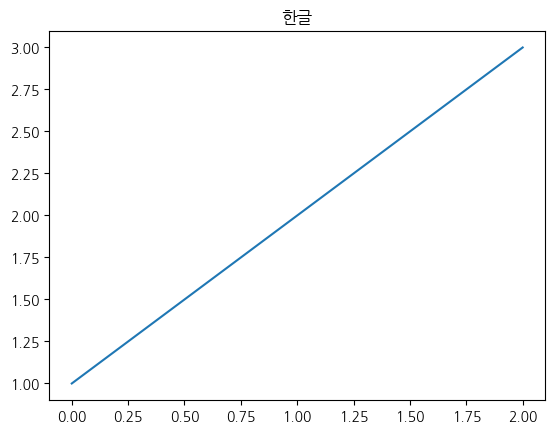

In [ ]:
# 테스트
import matplotlib.pyplot as plt
plt.rc("font", family = "NanumGothic")
plt.plot([1, 2, 3])
plt.title("한글")
plt.show()

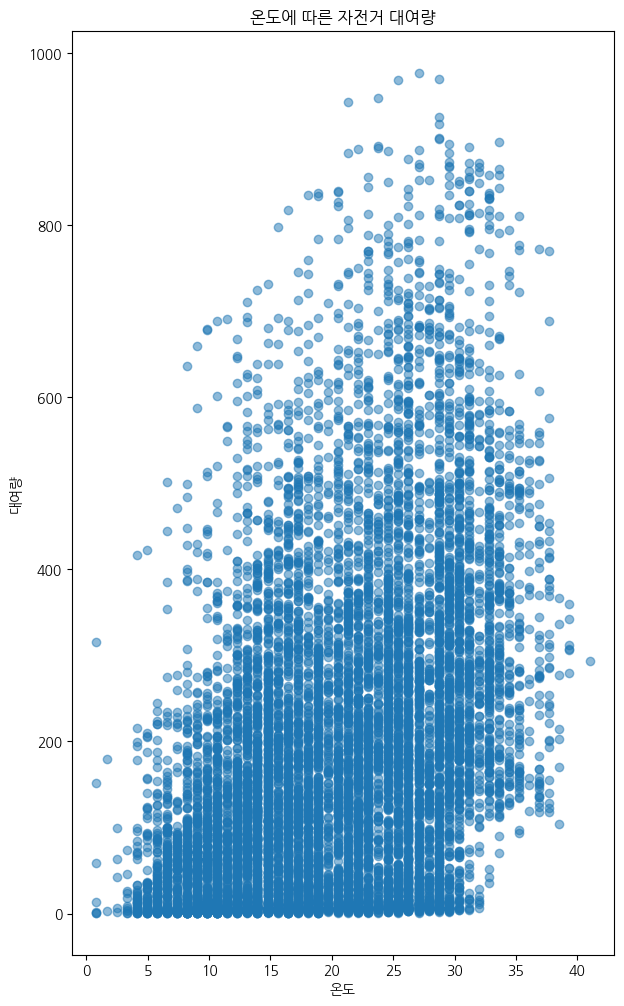

In [ ]:
import matplotlib.pyplot as plt
plt.rc("font", family = "NanumGothic")
plt.figure(figsize = (7, 12))

x_column = 'temp'
y_column = 'count'

plt.scatter(train[x_column], train[y_column], alpha = 0.5)

plt.xlabel("온도")
plt.ylabel("대여량")

plt.title("온도에 따른 자전거 대여량")
plt.show()

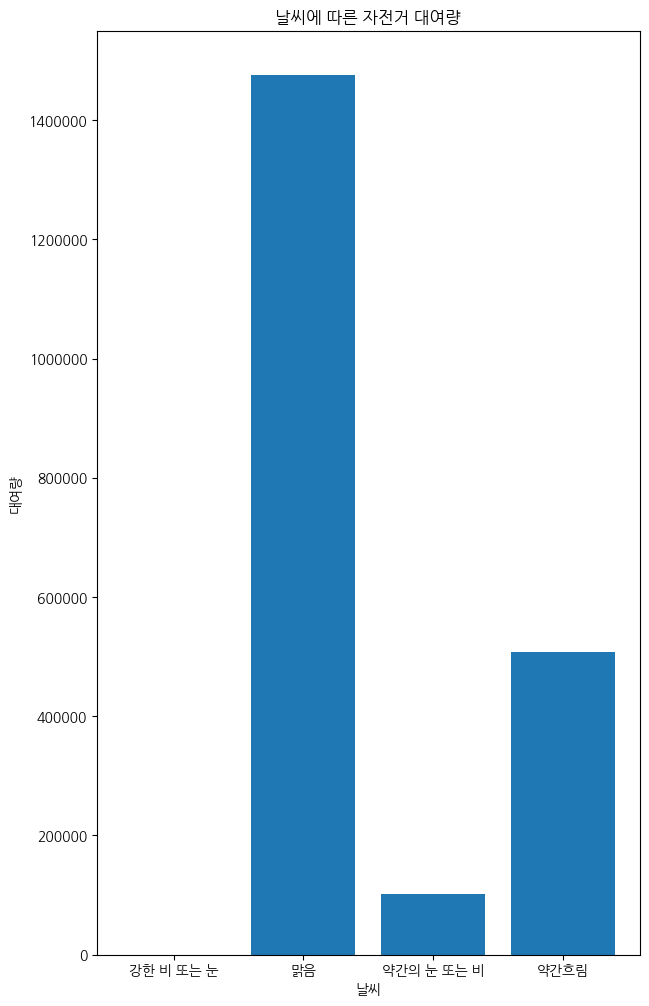

In [ ]:
import matplotlib.pyplot as plt
plt.rc("font", family = "NanumGothic")
plt.figure(figsize = (7, 12))

x_column = 'weather'
y_column = 'count'

weather = train.groupby(x_column)[y_column].sum()

plt.bar(weather.index, weather.values)

plt.xlabel("날씨")
plt.ylabel("대여량")
plt.gca().get_yaxis().get_major_formatter().set_scientific(False)
plt.title("날씨에 따른 자전거 대여량")
plt.show()

## 탐색적 데이터 분석
- 머신러닝을 진행할 때 왜 하냐?
- 머신러닝
  + 예측을 하기 위한 방법론
- 최신 알고리즘이 있으니까, 그거 쓰면 되는 거 아닌가?
  + 코드는 3줄이지만, 우리가 생각하고 분석해야해서 쉽게 볼 것은 아니다.
- 시각화를 작성해서 얻고자 하는 목적은?
  +

탐색적 데이터 분석 <==> Feature Engineering

Feature Engineering <==> 머신러닝 알고리즘에 적용할 독립변수를 찾아서 넣어주는 것

==> 미래 예측을 한다고 할 때, 필요한 독립변수는 최소 몇개가 필요한가?
(1개)

y = x1 + x2 + x3 + x4 + ```

y = ax + b, y = ax^2 + bx + c

## 내가 사용하고자 한 독립변수 x 컬럼이 정말로 y 변수에 중요한 영향을 끼치는 변수인지를 먼저 확인하자!

## 여러 컬럼들이 중복이 될 수도 있고, 아니면 중요하지 않은 컬럼이 있을 수도 있고, 이런 컬럼을 우리는 찾고 적절하게 처리해야 한다.
### (종속 변수에 영향을 주는지 안주는지 체크하기)

- 그러면 각 독립변수의 기울기를 찾는 것이 머신러닝이고, 그 독립변수를 추리는 게 탐색적 데이터 분석인가요?

- 정형 데이터 컬럼이 존재하고, 그걸 추리는 역할은 우리가 하는데 이것을 머신러닝을 활용한다.
- 비 정형 데이터 이미지, 영상을 추리는 것을 알고리즘이 해주고 이것은 딥러닝이 한다.

In [ ]:
import seaborn as sns
import matplotlib as mlp
import matplotlib.pyplot as plt

<Axes: xlabel='count', ylabel='Count'>

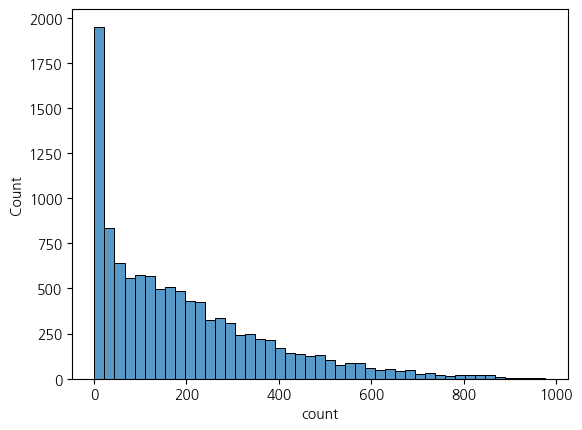

In [ ]:
fig, ax = plt.subplots()
sns. histplot(train['count'])

## 종속변수 로그변환

<Axes: xlabel='count', ylabel='Count'>

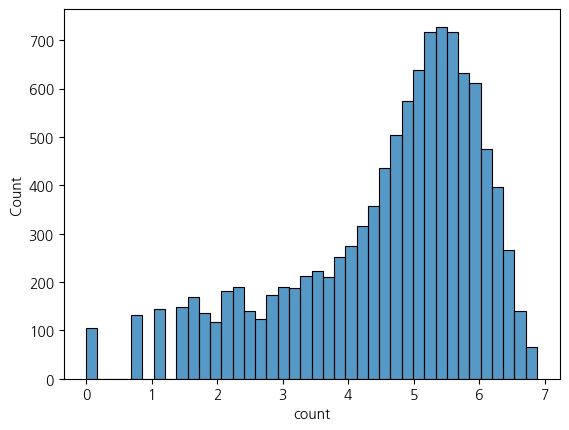

In [ ]:
sns. histplot(np.log(train['count']))

- 첫번째 작업 완료
  + 종속변수는 로그변환을 취해서 학습을 진행하기로 한다.
  + 로그 변환을 하고, 예측을 하면, 로그 변환된 값을 예측함
  + 로그 변환된 값을 지수 변환으로 변경해서 최종 예측함

### 막대 그래프

In [ ]:
train.head(1)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,year,month,day,hour,minute,second,weekday
0,2011-01-01 00:00:00,봄,0,0,맑음,9.84,14.395,81,0.0,3,13,16,2011-01-01,2011,01,01,00,00,00,Saturday


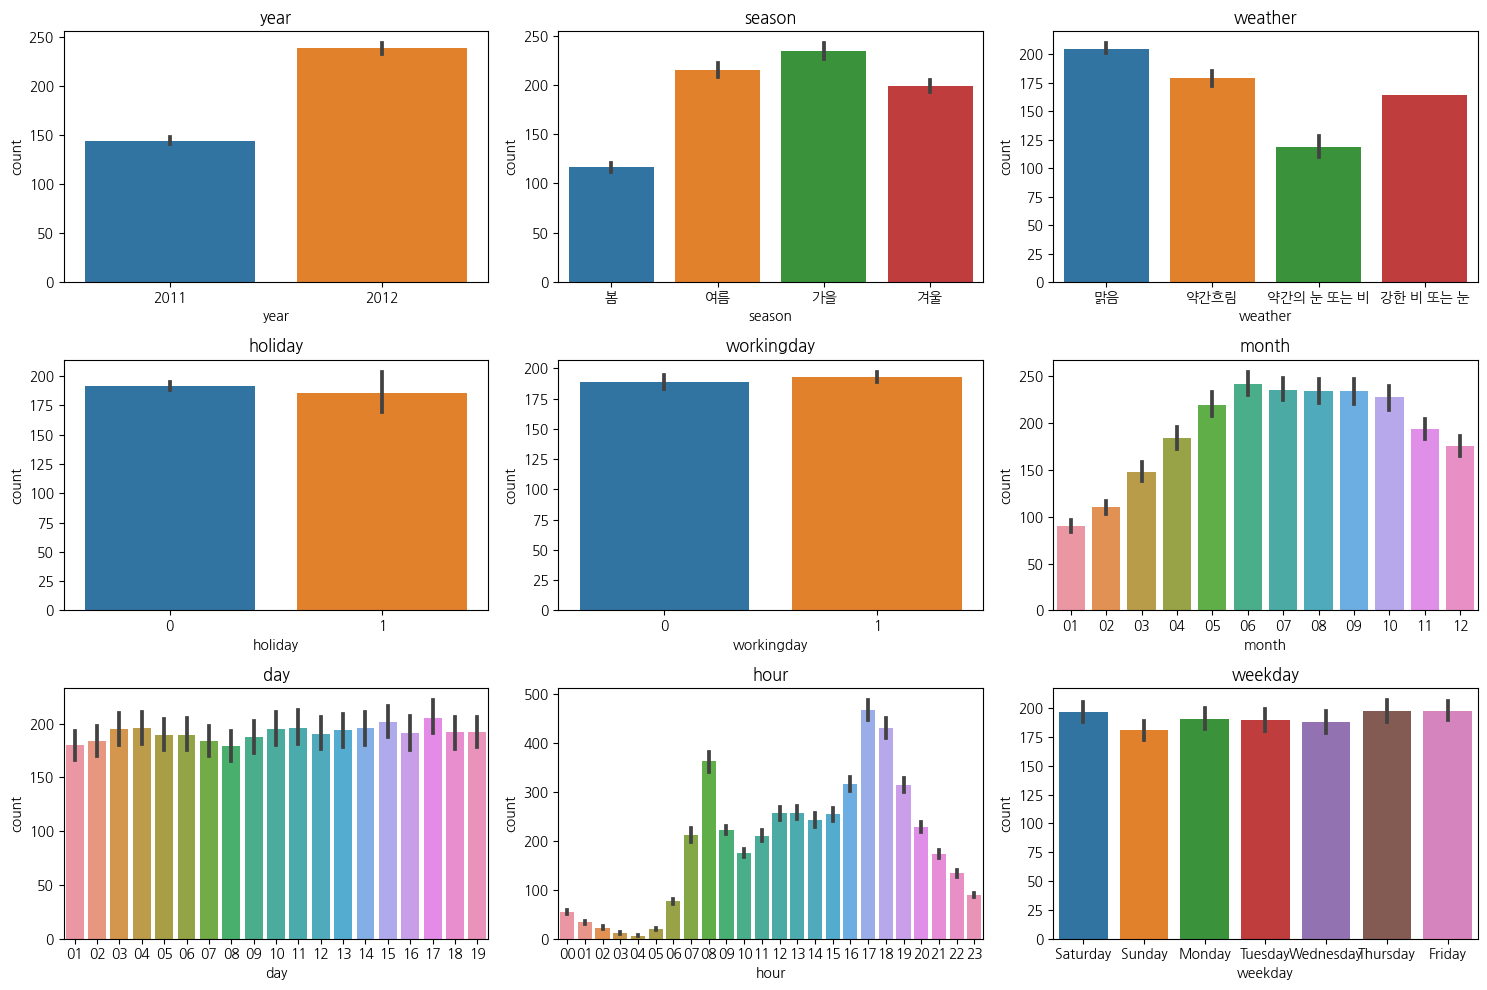

In [ ]:
fig, ax = plt.subplots(nrows = 3, ncols = 3, figsize=(15, 10))
sns.barplot(x = 'year', y = 'count', data = train, ax = ax[0, 0])
ax[0, 0].set_title("year")
sns.barplot(x = 'season', y = 'count', data = train, ax = ax[0, 1])
ax[0, 1].set_title("season")
sns.barplot(x = 'weather', y = 'count', data = train, ax = ax[0, 2])
ax[0, 2].set_title("weather")
sns.barplot(x = 'holiday', y = 'count', data = train, ax = ax[1, 0])
ax[1, 0].set_title("holiday")
sns.barplot(x = 'workingday', y = 'count', data = train, ax = ax[1, 1])
ax[1, 1].set_title("workingday")
sns.barplot(x = 'month', y = 'count', data = train, ax = ax[1, 2])
ax[1, 2].set_title("month")
sns.barplot(x = 'day', y = 'count', data = train, ax = ax[2, 0])
ax[2, 0].set_title("day")
sns.barplot(x = 'hour', y = 'count', data = train, ax = ax[2, 1])
ax[2, 1].set_title("hour")
sns.barplot(x = 'weekday', y = 'count', data = train, ax = ax[2, 2])
ax[2, 2].set_title("weekday")

plt.tight_layout()
plt.show()

In [ ]:
test['date'] = test['datetime'].apply(lambda x : x.split()[0])
test['year'] = test['datetime'].apply(lambda x: x.split()[0].split('-')[0])
test['month'] = test['datetime'].apply(lambda x: x.split()[0].split('-')[1])
test['day'] = test['datetime'].apply(lambda x: x.split()[0].split('-')[2])

test['hour'] = test['datetime'].apply(lambda x : x.split()[1].split(':')[0])
test['minute'] = test['datetime'].apply(lambda x : x.split()[1].split(':')[1])
test['second'] = test['datetime'].apply(lambda x : x.split()[1].split(':')[2])
test

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,date,year,month,day,hour,minute,second
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,2011-01-20,2011,01,20,00,00,00
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011-01-20,2011,01,20,01,00,00
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011-01-20,2011,01,20,02,00,00
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011-01-20,2011,01,20,03,00,00
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011-01-20,2011,01,20,04,00,00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6488,2012-12-31 19:00:00,1,0,1,2,10.66,12.880,60,11.0014,2012-12-31,2012,12,31,19,00,00
6489,2012-12-31 20:00:00,1,0,1,2,10.66,12.880,60,11.0014,2012-12-31,2012,12,31,20,00,00
6490,2012-12-31 21:00:00,1,0,1,1,10.66,12.880,60,11.0014,2012-12-31,2012,12,31,21,00,00
6491,2012-12-31 22:00:00,1,0,1,1,10.66,13.635,56,8.9981,2012-12-31,2012,12,31,22,00,00


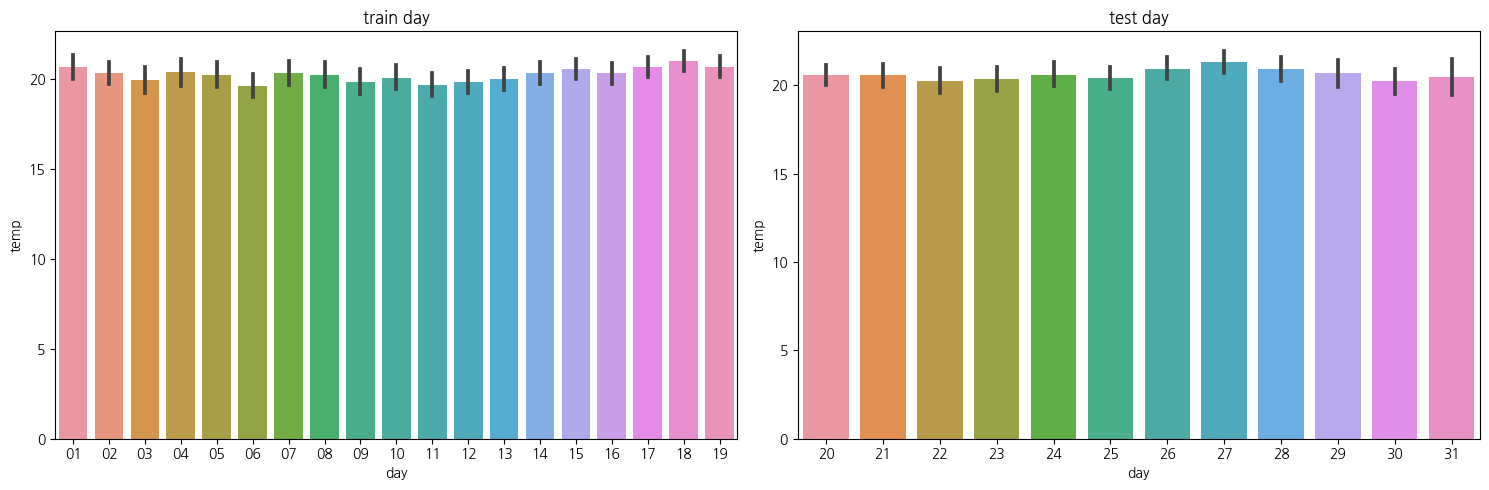

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

sns.barplot(x='day', y='temp', data=train, ax=ax[0])
ax[0].set_title("train day")

sns.barplot(x='day', y='temp', data=test, ax=ax[1])
ax[1].set_title("test day")

plt.tight_layout()
plt.show()


## day 컬럼 제거
- day 컬럼은 제외! 이유 : trian 1-19, test 20~31
  + 참조할만한 날짜가 훈련 데이터에 존재하지 않음

## second, minute 컬럼 제거
- 아무런 정보가 없음

## boxplot
- season, weather, weekday, holiday
- 2 X 2 배열이 나오도록 시각화 작성하기

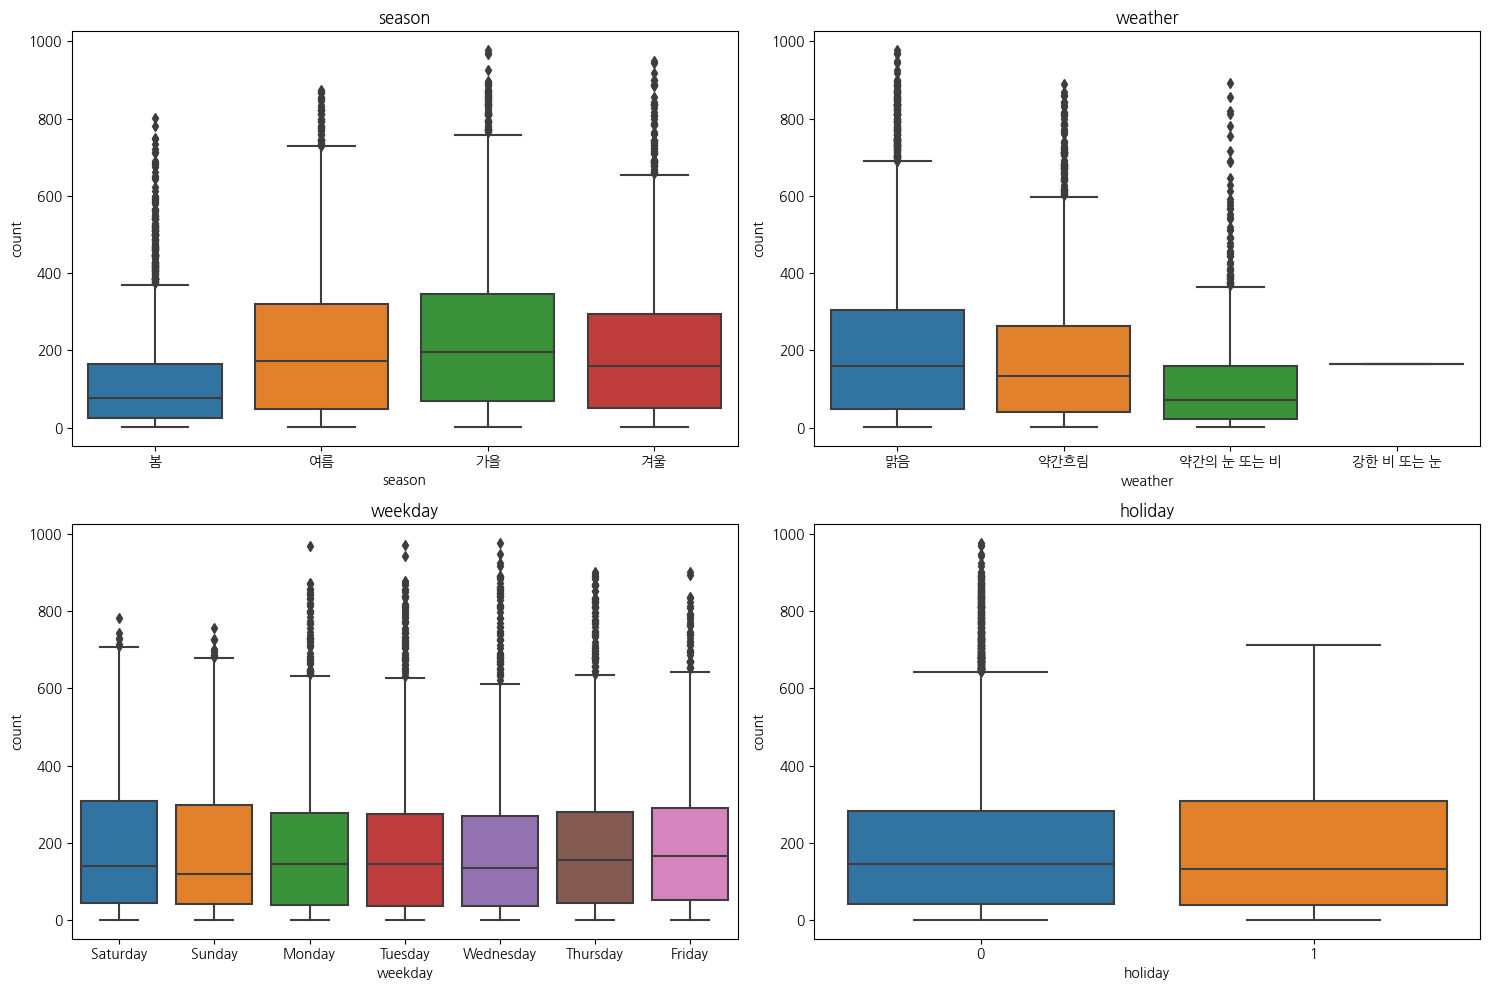

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

sns.boxplot(x='season', y='count', data=train, ax=ax[0, 0])
ax[0, 0].set_title("season")

sns.boxplot(x='weather', y='count', data=train, ax=ax[0, 1])
ax[0, 1].set_title("weather")

sns.boxplot(x='weekday', y='count', data=train, ax=ax[1, 0])
ax[1, 0].set_title("weekday")

sns.boxplot(x='holiday', y='count', data=train, ax=ax[1, 1])
ax[1, 1].set_title("holiday")

plt.tight_layout()
plt.show()



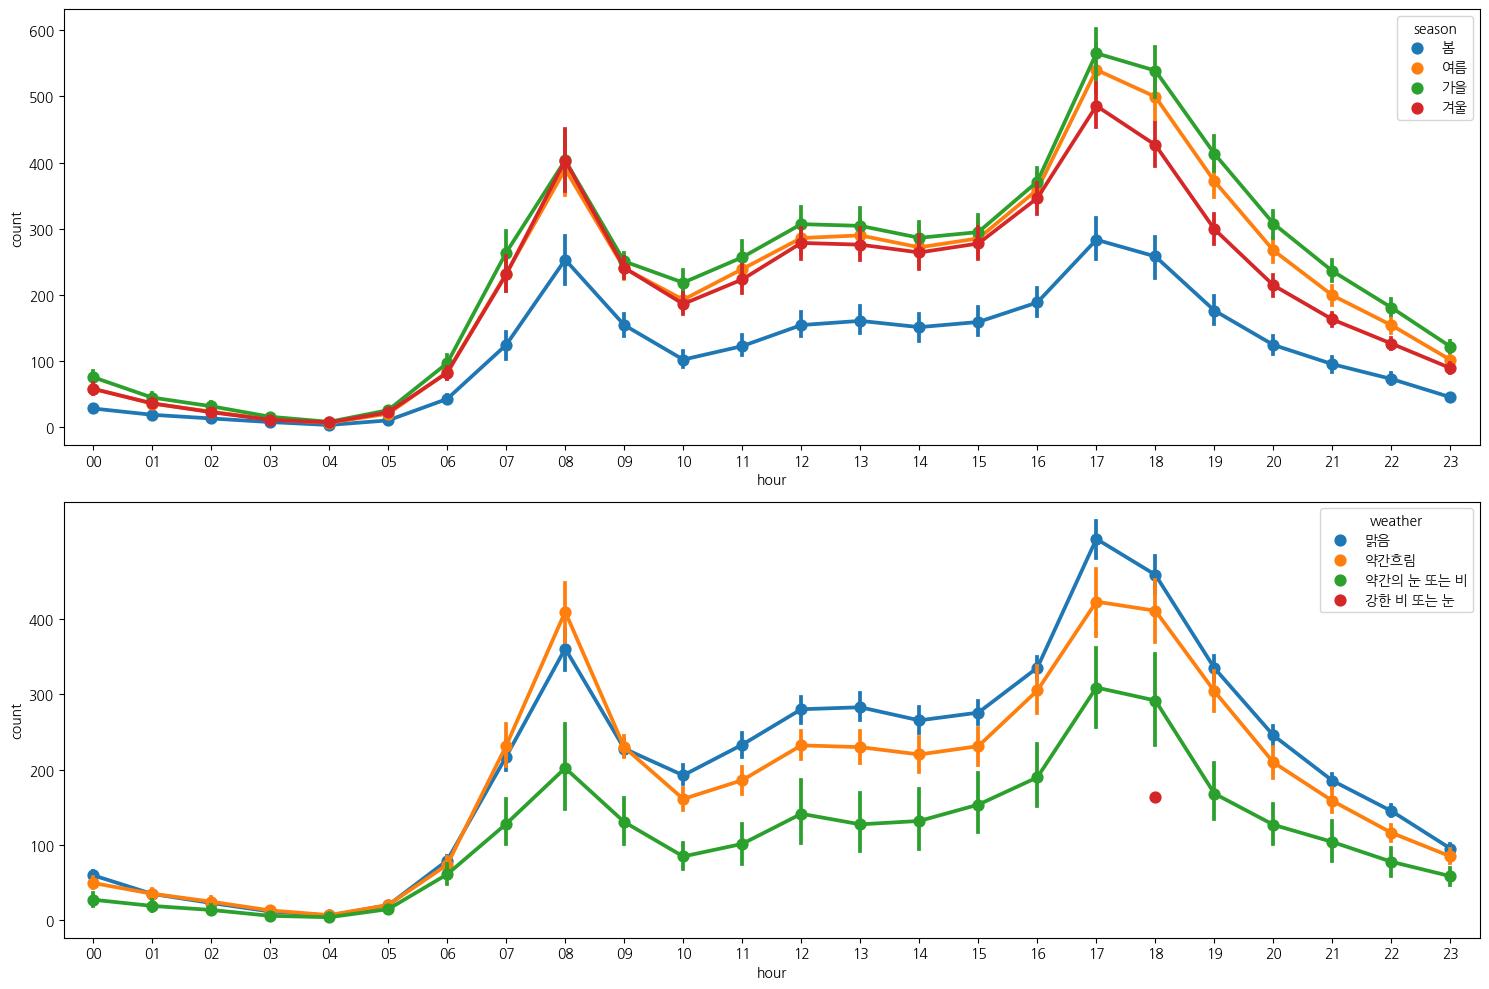

In [ ]:
fig, ax = plt.subplots(nrows = 2, figsize=(15, 10))

# 근무일, 공휴일, 날씨, 계절에 따라 다름
sns.pointplot(x = 'hour', y = 'count' , hue = 'season', data = train,  ax=ax[0])
sns.pointplot(x = 'hour', y = 'count' , hue = 'weather', data = train,  ax=ax[1])

ax[0].set_yticks(range(0, 600 + 100, 100))
ax[1].set_yticks(range(0, 500, 100))

plt.tight_layout()
plt.show()

In [ ]:
train['weather'].value_counts()

맑음            7192
약간흐림          2834
약간의 눈 또는 비     859
강한 비 또는 눈        1
Name: weather, dtype: int64

-  첫번째 : 시스템 이상? => PM 보고 => 개발자 수정
- 데이터 시각화로 저 이상치 잡아내기


## 강한 눈 또는 비 항목은 삭제하기

# 회귀식 산점도


In [ ]:
train.head(1)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,year,month,day,hour,minute,second,weekday
0,2011-01-01 00:00:00,봄,0,0,맑음,9.84,14.395,81,0.0,3,13,16,2011-01-01,2011,01,01,00,00,00,Saturday


In [ ]:
#regplot() 사용
# 2 X 2

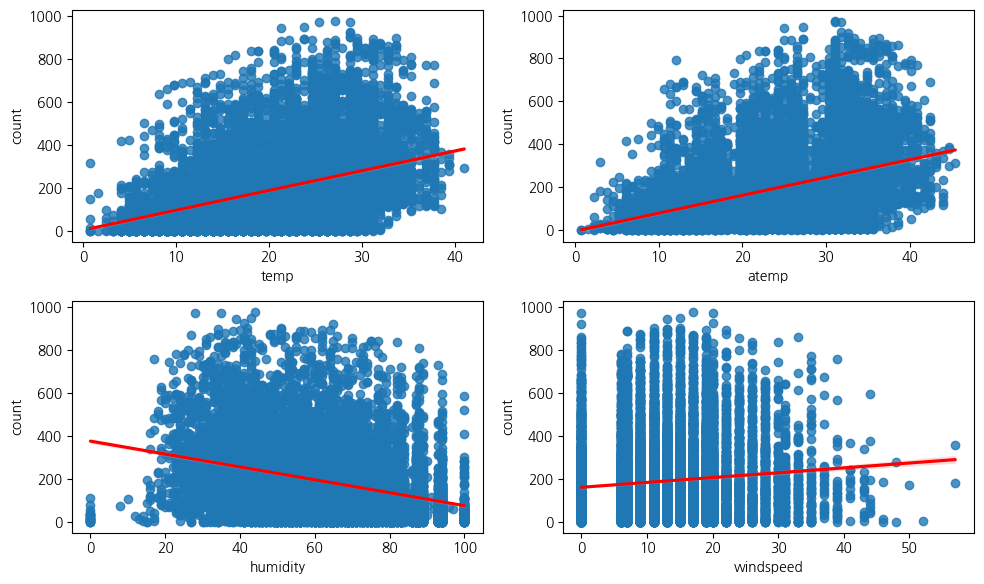

In [ ]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10, 6))

sns.set(style="whitegrid")
sns.regplot(x = 'temp', y = 'count', data = train, ax=ax[0,0], line_kws={'color':'red'})
sns.regplot(x = 'atemp', y = 'count', data = train, ax=ax[0,1], line_kws={'color':'red'})
sns.regplot(x = 'humidity', y = 'count', data = train, ax=ax[1,0], line_kws={'color':'red'})
sns.regplot(x = 'windspeed', y = 'count', data = train, ax=ax[1,1], line_kws={'color':'red'})

plt.tight_layout()
plt.show()

그래프의 기울기와 0값이 적은 것을 파악해서 temp, humidity 컬럼을 선정함

## 최종적인 input 변수 선정

In [ ]:
cols = ['', '', '']
final_df = train.loc[train['weather'] == "강한 눈 또는 비", cols]

# 탐색적 데이터 분석이 끝난 데이터가 됨